Using device: cpu
Epoch [1/11], Loss: 7.6222
Epoch [3/11], Loss: 0.4187
Epoch [5/11], Loss: 0.3425
Epoch [7/11], Loss: 0.2995
Epoch [9/11], Loss: 0.2759
Epoch [11/11], Loss: 0.2622


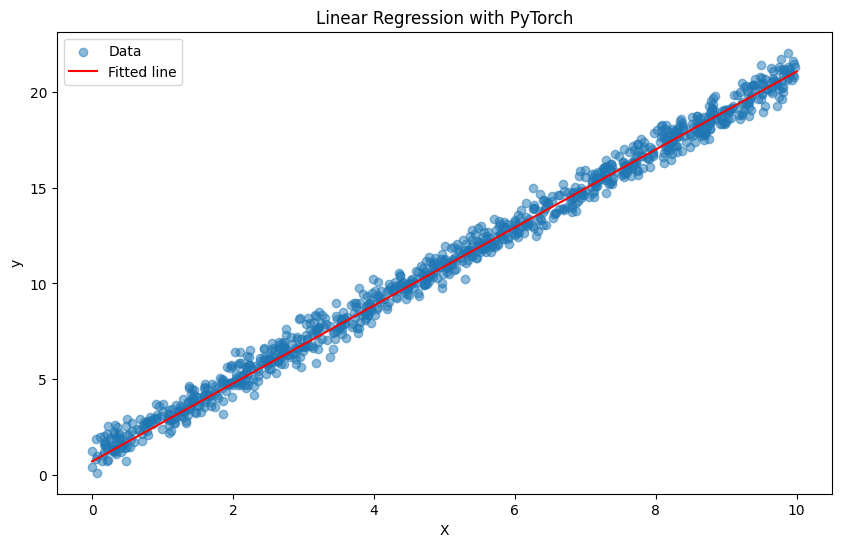

Learned parameters: W = 2.0365, b = 0.7052


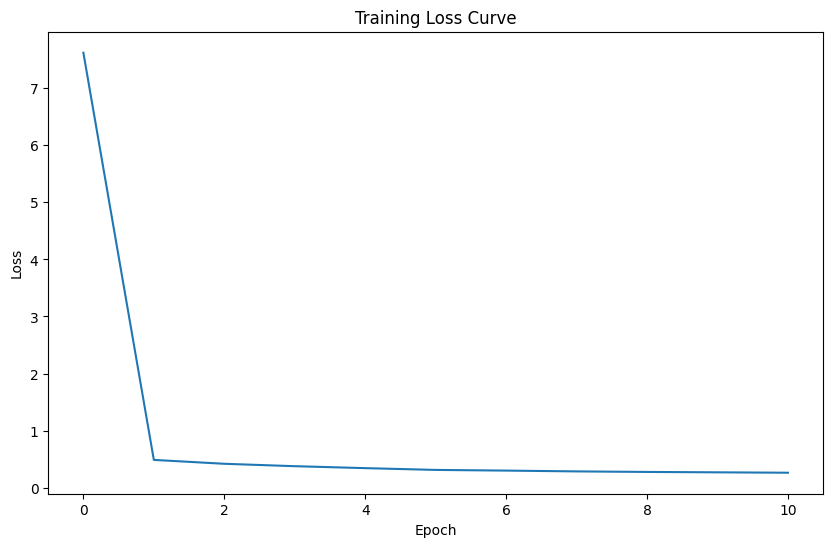

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Check if GPU is available
# This is a method that determines if a GPU is available and sets the device accordingly,
# otherwise it sets the device to CPU.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Step 1: Create a custom dataset

# Inherit from the Dataset class from PyTorch and implement the __len__ and __getitem__ methods.
class LinearRegressionDataset(Dataset):
    # The __init__ method initializes the dataset and generates random data points.
    # A method is a function that belongs to an object and is defined within the class.
    def __init__(self, num_samples=1000):
        self.X = torch.rand(num_samples, 1) * 10 # Random values between 0 and 10 with shape (num_samples, 1)
        self.y = 2 * self.X + 1 + torch.randn(num_samples, 1) * 0.5 # y = 2X + 1 + noise (noise is Gaussian with mean 0 and variance 0.5)

    # The __len__ method returns the number of samples in the dataset.
    # The len() function in Python returns the length of an object.
    def __len__(self):
        return len(self.X)

    # The __getitem__ method returns a sample from the dataset at the given index.
    # The index is the key used to retrieve the sample.
    # The purpose of the __getitem__ method is to allow indexing of the dataset.
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Step 2: Define the model
# Inherit from the nn.Module class from PyTorch and implement the __init__ and forward methods.
class LinearRegression(nn.Module):
    # The __init__ method initializes the model and defines the layers.
    def __init__(self):
        # The super() function is used to call the __init__ method of the parent class.
        # The parent class is the class from which the current class inherits.
        super().__init__()
        # The nn.Linear class creates a linear transformation (Wx + b) with one input feature and one output feature.
        # The input feature is the X value and the output feature is the predicted y value.
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Step 3: Instantiate the dataset, model, loss function, and optimizer
dataset = LinearRegressionDataset()
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

model = LinearRegression().to(device)
criterion = nn.MSELoss() # Mean Squared Error loss
optimizer = optim.SGD(model.parameters(), lr=0.01) # Stochastic Gradient Descent optimizer

# Step 4: Training loop
epochs = 11
losses = []

for epoch in range(epochs):
    epoch_loss = 0
    for batch_X, batch_y in dataloader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        # Forward pass
        y_pred = model(batch_X)
        loss = criterion(y_pred, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(dataloader)
    losses.append(avg_loss)

    if (epoch) % 2 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')

# Step 5: Evaluate the model
model.eval()
with torch.no_grad():
    X_test = torch.linspace(0, 10, 100).view(-1, 1).to(device)
    y_pred = model(X_test)

# Move tensors to CPU for plotting
X_test = X_test.cpu()
y_pred = y_pred.cpu()

# Step 6: Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(dataset.X, dataset.y, label='Data', alpha=0.5)
plt.plot(X_test, y_pred, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression with PyTorch')
plt.show()

# Print model parameters
print(f"Learned parameters: W = {model.linear.weight.item():.4f}, b = {model.linear.bias.item():.4f}")

# Plot loss curve
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()